<a href="https://colab.research.google.com/github/dphi-official/Datathons/blob/master/Top_Notebook_Submissions/Data_Sprint/Data_Sprint_8/UmaRam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

link: https://dphi.tech/practice/challenge/37


# Data Sprint #8: Audit Data
Predict the fraudulent firm


**Objective**
The goal here is to help the auditors by building a classification model that can predict the fraudulent firm on the basis of present and historical risk factors.


**Evaluation Criteria**
Submissions are evaluated using F1 Score.

**About the Data**
The information about the sectors and the counts of firms are listed respectively as Irrigation (114), Public Health (77), Buildings and Roads (82), Forest (70), Corporate (47), Animal Husbandry (95), Communication (1), Electrical (4), Land (5), Science and Technology (3), Tourism (1), Fisheries (41), Industries (37), Agriculture (200)


To load the training data in your jupyter notebook, use the below command:

```
import pandas as pd

audit_data  = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/audit_data/training_set_label.csv" )
```

**Attribute Information **

Many risk factors are examined from various areas like past records of audit office, audit-paras, environmental conditions reports, firm reputation summary, on-going issues report, profit-value records, loss-value records, follow-up reports etc. After in-depth interviews with the auditors, important risk factors are evaluated and their probability of existence is calculated from the present and past records.


**Test Dataset**
Load the test data (name it as test_data). You can load the data using the below command.
```
test_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/audit_data/testing_set_label.csv')

```
Here the target column is deliberately not there as you need to predict it.


# **Load Libraries and datasets**

In [ ]:
import numpy as np        # Fundamental package for linear algebra and multidimensional arrays
import pandas as pd       # Data analysis and manipultion tool
import datetime

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier,  GradientBoostingClassifier
# import mean squared error from sklearn.metric
from sklearn.metrics import f1_score
#Decisoin Tree classifier


In [ ]:
# Load Dataset
audit_data  = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/audit_data/training_set_label.csv" )

In [ ]:
audit_data.head()

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_B.1,Risk_C,Money_Value,Score_MV,Risk_D,District_Loss,PROB,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
0,2.72,8,1.13,0.4,0.452,0.00,0.2,0.000,1.13,5.0,0.2,1.0,0.00,0.2,0.000,2,0.2,0.4,0,0.2,0.0,2.2,1.852,0.4,0.5,0.3704,0
1,1.85,13,8.25,0.6,4.950,1.59,0.4,0.636,9.84,5.0,0.2,1.0,0.02,0.2,0.004,2,0.2,0.4,0,0.2,0.0,3.0,6.990,0.4,0.5,1.3980,1
2,2.72,19,2.13,0.6,1.278,0.59,0.2,0.118,2.72,5.0,0.2,1.0,0.76,0.2,0.152,2,0.2,0.4,0,0.2,0.0,2.4,2.948,0.4,0.5,0.5896,0
3,59.85,21,0.42,0.2,0.084,0.00,0.2,0.000,0.42,5.0,0.2,1.0,0.00,0.2,0.000,4,0.2,0.8,0,0.2,0.0,2.2,1.884,0.8,0.5,0.7536,0
4,2.72,4,1.33,0.4,0.532,0.35,0.2,0.070,1.68,5.0,0.2,1.0,0.00,0.2,0.000,2,0.2,0.4,0,0.2,0.0,2.2,2.002,0.4,0.5,0.4004,0


In [ ]:
audit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 543 entries, 0 to 542
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sector_score    543 non-null    float64
 1   LOCATION_ID     543 non-null    object 
 2   PARA_A          543 non-null    float64
 3   Score_A         543 non-null    float64
 4   Risk_A          543 non-null    float64
 5   PARA_B          543 non-null    float64
 6   Score_B         543 non-null    float64
 7   Risk_B          543 non-null    float64
 8   TOTAL           543 non-null    float64
 9   numbers         543 non-null    float64
 10  Score_B.1       543 non-null    float64
 11  Risk_C          543 non-null    float64
 12  Money_Value     543 non-null    float64
 13  Score_MV        543 non-null    float64
 14  Risk_D          543 non-null    float64
 15  District_Loss   543 non-null    int64  
 16  PROB            543 non-null    float64
 17  RiSk_E          543 non-null    flo

In [ ]:
audit_data.LOCATION_ID.value_counts()



8          54
19         51
16         37
9          34
5          32
12         31
2          30
6          28
4          24
15         23
13         20
11         18
32         17
29         14
22         13
14         13
18         11
39          9
1           7
43          7
31          7
21          7
27          7
25          6
20          5
37          5
28          4
38          4
30          3
7           3
3           3
40          3
36          3
35          2
17          1
41          1
23          1
44          1
34          1
33          1
SAFIDON     1
NUH         1
Name: LOCATION_ID, dtype: int64

In [ ]:
audit_data1 = audit_data.copy()

In [ ]:
#Apply Label Encoder for LOCATION_ID field
labelencoder = LabelEncoder()
audit_data1['LOCATION_ID'] = labelencoder.fit_transform(audit_data1['LOCATION_ID'])

In [ ]:
audit_data1.LOCATION_ID.value_counts()


38    54
9     51
6     37
39    34
35    32
2     31
10    30
36    28
30    24
5     23
3     20
1     18
22    17
18    14
4     13
13    13
8     11
29     9
16     7
0      7
12     7
21     7
33     7
15     6
11     5
27     5
28     4
17     4
20     3
19     3
26     3
31     3
37     3
25     2
14     1
40     1
23     1
24     1
7      1
32     1
34     1
41     1
Name: LOCATION_ID, dtype: int64

In [ ]:

audit_data1.shape[0]

543

In [ ]:
audit_data1.History.value_counts()

0    515
1     21
2      4
9      1
5      1
4      1
Name: History, dtype: int64

In [ ]:
# columns to be dropped
Columns_To_Drop = ['Inherent_Risk','CONTROL_RISK','Detection_Risk']
audit_data1.drop(Columns_To_Drop,axis=1,inplace=True)
audit_data1.head(5)

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_B.1,Risk_C,Money_Value,Score_MV,Risk_D,District_Loss,PROB,RiSk_E,History,Prob,Risk_F,Score,Audit_Risk,Risk
0,2.72,38,1.13,0.4,0.452,0.00,0.2,0.000,1.13,5.0,0.2,1.0,0.00,0.2,0.000,2,0.2,0.4,0,0.2,0.0,2.2,0.3704,0
1,1.85,3,8.25,0.6,4.950,1.59,0.4,0.636,9.84,5.0,0.2,1.0,0.02,0.2,0.004,2,0.2,0.4,0,0.2,0.0,3.0,1.3980,1
2,2.72,9,2.13,0.6,1.278,0.59,0.2,0.118,2.72,5.0,0.2,1.0,0.76,0.2,0.152,2,0.2,0.4,0,0.2,0.0,2.4,0.5896,0
3,59.85,12,0.42,0.2,0.084,0.00,0.2,0.000,0.42,5.0,0.2,1.0,0.00,0.2,0.000,4,0.2,0.8,0,0.2,0.0,2.2,0.7536,0
4,2.72,30,1.33,0.4,0.532,0.35,0.2,0.070,1.68,5.0,0.2,1.0,0.00,0.2,0.000,2,0.2,0.4,0,0.2,0.0,2.2,0.4004,0


In [ ]:
audit_data1[['Risk_A','Risk_B','Risk_C','Risk_D','RiSk_E','Risk_F']]

,Risk_A,Risk_B,Risk_C,Risk_D,RiSk_E,Risk_F
0,0.452,0.0000,1.0,0.000,0.4,0.0
1,4.950,0.6360,1.0,0.004,0.4,0.0
2,1.278,0.1180,1.0,0.152,0.4,0.0
3,0.084,0.0000,1.0,0.000,0.8,0.0
4,0.532,0.0700,1.0,0.000,0.4,0.0
...,...,...,...,...,...,...
538,1.812,0.0000,1.0,0.000,1.2,0.0
539,2.202,0.0360,1.0,0.000,0.4,0.0
540,0.062,0.0003,1.0,0.000,0.4,0.0
541,0.106,0.0000,1.0,0.466,0.4,0.0


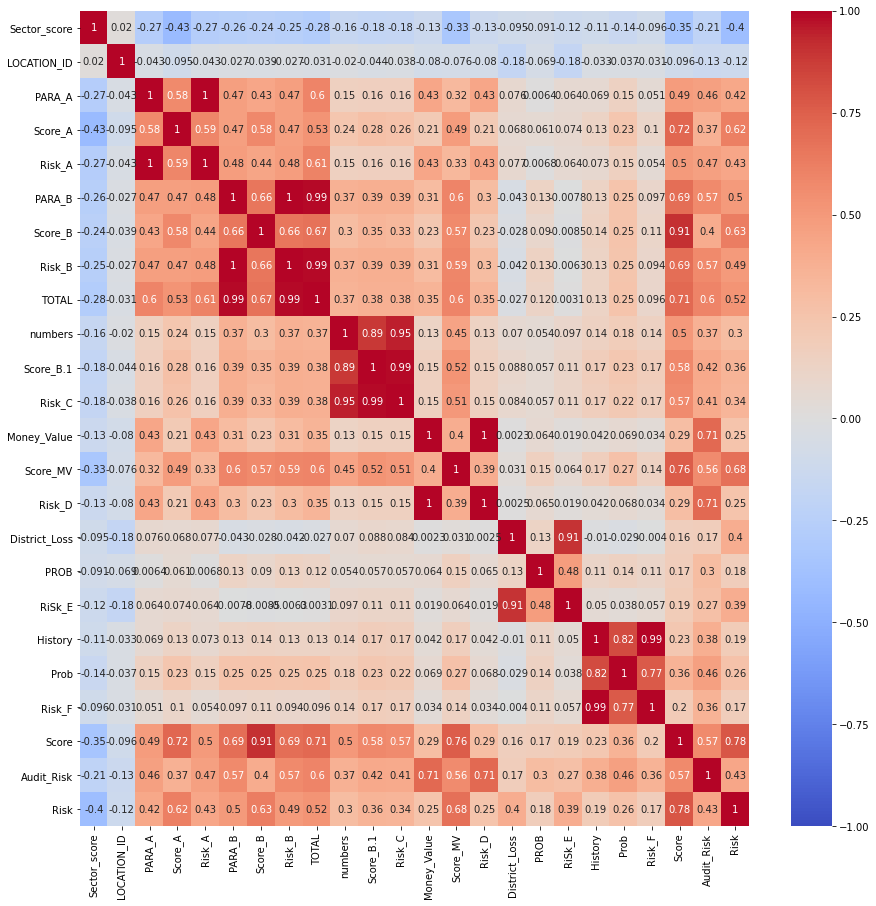

In [ ]:
import seaborn as sns
plt.figure(figsize=(15,15))
sns.heatmap(audit_data1.corr(),vmin=-1,
            vmax=1,
            cmap='coolwarm',
            annot=True);

In [ ]:
X = audit_data1.drop('Risk', axis=1)
y = audit_data1.Risk

In [ ]:
#split the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

In [ ]:
print('F1 Score is: ', np.sqrt(f1_score(y_test, pred_rfc))) 

F1 Score is:  0.9949366763261821


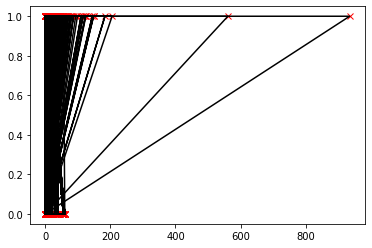

In [ ]:
plt.plot(X_test, y_test,'rx')
plt.plot(X_test, pred_rfc, color='black')
plt.show()

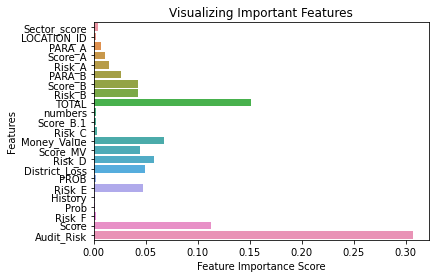

In [ ]:
feat_importances = pd.Series(rfc.feature_importances_, index=X_train.columns)
sns.barplot(x=feat_importances, y=feat_importances.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
#plt.legend()
plt.show()

In [ ]:
from sklearn.feature_selection import SelectFromModel
rf_sfm = SelectFromModel(rfc)
# Train the selector
rf_sfm = rf_sfm.fit(X_train, y_train)
X_important_train = rf_sfm.transform(X_train)
X_important_test = rf_sfm.transform(X_test)

In [ ]:
# 23 features
X_train.shape

(434, 23)

In [ ]:
#After feature selection, only 9 features
X_important_train.shape

(434, 9)

In [ ]:
rfc_clf_important = RandomForestClassifier(n_estimators=150, random_state=42, n_jobs=-1)
rfc_clf_important.fit(X_important_train, y_train)
pred_rfc_imp_feat = rfc_clf_important.predict(X_important_test)
print('F1 Score is: ', np.sqrt(f1_score(y_test, pred_rfc_imp_feat))) 

F1 Score is:  1.0


# Testing

In [ ]:
#Load test dataset

test_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/audit_data/testing_set_label.csv')
test_data.head()

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_B.1,Risk_C,Money_Value,Score_MV,Risk_D,District_Loss,PROB,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk
0,3.89,22,0.00,0.2,0.000,18.05,0.6,10.830,18.05,5.0,0.2,1.0,2.29,0.2,0.458,2,0.2,0.4,0,0.2,0.0,3.2,12.688,0.4,0.5,2.5376
1,55.57,29,1.26,0.4,0.504,1.58,0.4,0.632,2.84,5.0,0.2,1.0,6.50,0.4,2.600,2,0.2,0.4,0,0.2,0.0,3.0,5.136,0.4,0.5,1.0272
2,2.72,16,0.00,0.2,0.000,0.00,0.2,0.000,0.00,5.0,0.2,1.0,0.00,0.2,0.000,4,0.2,0.8,0,0.2,0.0,2.2,1.800,0.8,0.5,0.7200
3,59.85,4,0.00,0.2,0.000,0.00,0.2,0.000,0.00,5.0,0.2,1.0,0.00,0.2,0.000,2,0.2,0.4,0,0.2,0.0,2.0,1.400,0.4,0.5,0.2800
4,3.41,16,11.73,0.6,7.038,85.87,0.6,51.522,97.60,5.0,0.2,1.0,6.96,0.4,2.784,2,0.2,0.4,1,0.4,0.4,4.0,63.144,0.8,0.5,25.2576


In [ ]:
test_data.shape

(233, 26)

In [ ]:
#test_data.LOCATION_ID apply label encoding
test_data['LOCATION_ID'] = labelencoder.fit_transform(test_data['LOCATION_ID'])

In [ ]:
#Drop Columns
test_data.drop(Columns_To_Drop,axis=1,inplace=True)
test_data.head(5)

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_B.1,Risk_C,Money_Value,Score_MV,Risk_D,District_Loss,PROB,RiSk_E,History,Prob,Risk_F,Score,Audit_Risk
0,3.89,11,0.00,0.2,0.000,18.05,0.6,10.830,18.05,5.0,0.2,1.0,2.29,0.2,0.458,2,0.2,0.4,0,0.2,0.0,3.2,2.5376
1,55.57,15,1.26,0.4,0.504,1.58,0.4,0.632,2.84,5.0,0.2,1.0,6.50,0.4,2.600,2,0.2,0.4,0,0.2,0.0,3.0,1.0272
2,2.72,6,0.00,0.2,0.000,0.00,0.2,0.000,0.00,5.0,0.2,1.0,0.00,0.2,0.000,4,0.2,0.8,0,0.2,0.0,2.2,0.7200
3,59.85,21,0.00,0.2,0.000,0.00,0.2,0.000,0.00,5.0,0.2,1.0,0.00,0.2,0.000,2,0.2,0.4,0,0.2,0.0,2.0,0.2800
4,3.41,6,11.73,0.6,7.038,85.87,0.6,51.522,97.60,5.0,0.2,1.0,6.96,0.4,2.784,2,0.2,0.4,1,0.4,0.4,4.0,25.2576


In [ ]:
test_data.shape

(233, 23)

In [ ]:
test_data.isnull().sum()

Sector_score     0
LOCATION_ID      0
PARA_A           0
Score_A          0
Risk_A           0
PARA_B           0
Score_B          0
Risk_B           0
TOTAL            0
numbers          0
Score_B.1        0
Risk_C           0
Money_Value      1
Score_MV         0
Risk_D           0
District_Loss    0
PROB             0
RiSk_E           0
History          0
Prob             0
Risk_F           0
Score            0
Audit_Risk       0
dtype: int64

In [ ]:
#Fill the null value
test_data["Money_Value"].fillna( method ='ffill', inplace = True) 

In [ ]:
test_new_important = rf_sfm.transform(test_data)
target = rfc_clf_important.predict(test_new_important)

In [ ]:
# To create Dataframe of predicted value with particular respective index
res = pd.DataFrame(target) # target are nothing but the final predictions of your model on input features of your new unseen test data
res.index = test_data.index # its important for comparison. Here "test_new" is your new test dataset
res.columns = ["prediction"]

# To download the csv file locally
from google.colab import files
res.to_csv('auditsubmission.csv')         
files.download('auditsubmission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>